<a href="https://colab.research.google.com/github/glgaspar/Coursework-Assignments/blob/main/Ana%CC%81lise_explorato%CC%81ria_dataset_wine_Grupo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Especialização em Ciência de Dados - PUC-Rio
## Machine Learning - Prof. Tatiana Escovedo
### Exercício 1: Análise Exploratória e Pré-processamento de Dados



---


<b>Alunos: </b> Antônio Moreira, Bruna Lima de Oliveira, Daiane S Macedo, Gustavo Gaspar, Jurjus Alvarenga, Lorenna Francelino e Renata Soares.



---



<b>Escolha um dataset simples (preferencialmente do UCI Machine Learning Repository - https://archive.ics.uci.edu/ml/index.php ou do Scikit-Learn) e treine a análise exploratória e o pré-processamento de dados com os comandos aprendidos em aula.</b>

## Análise Exploratória



Os dados do dataset são resultados de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos. 

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from tabulate import tabulate
from prettytable import PrettyTable
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.preprocessing import OrdinalEncoder # para ordinal encoding
from sklearn.preprocessing import OneHotEncoder # para one-hot encoding e dummy encoding

# renderiza as imagens
%matplotlib inline

In [ ]:
# Instalando o pandas profiling (executar apenas na 1a vez - descomente a linha abaixo e execute o bloco de código)
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# Informa a URL de importação do dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Informa o cabeçalho das colunas
atributos = ['class', 'alcohol', 'malic', 'ash', 'alcalinity', 'magnesium', 'phenols', 'flavanoids', 'nonflavanoid', 'proanthocyanins', 'color', 'hue', 'dilution', 'proline']

# Lê o arquivo utilizando as colunas informadas
wine = pd.read_csv(url, names=atributos, skiprows=0, delimiter=',')

# exibe as primeiras 10 linhas do dataset
print("10 primeiras linhas do dataset")
print(tabulate(wine.head(10), headers='keys', tablefmt='psql'))


10 primeiras linhas do dataset
+----+---------+-----------+---------+-------+--------------+-------------+-----------+--------------+----------------+-------------------+---------+-------+------------+-----------+
|    |   class |   alcohol |   malic |   ash |   alcalinity |   magnesium |   phenols |   flavanoids |   nonflavanoid |   proanthocyanins |   color |   hue |   dilution |   proline |
|----+---------+-----------+---------+-------+--------------+-------------+-----------+--------------+----------------+-------------------+---------+-------+------------+-----------|
|  0 |       1 |     14.23 |    1.71 |  2.43 |         15.6 |         127 |      2.8  |         3.06 |           0.28 |              2.29 |    5.64 |  1.04 |       3.92 |      1065 |
|  1 |       1 |     13.2  |    1.78 |  2.14 |         11.2 |         100 |      2.65 |         2.76 |           0.26 |              1.28 |    4.38 |  1.05 |       3.4  |      1050 |
|  2 |       1 |     13.16 |    2.36 |  2.67 |        

O dataset tem 178 instâncias e 13 atributos, mais a classe


In [ ]:
wine.shape

(178, 14)

###Distribuição das classes

As classes encontram-se bem distribuídas e relativamente balanceadas, como podemos ver no gráfico de pizza e no *gráfico* de colunas a seguir


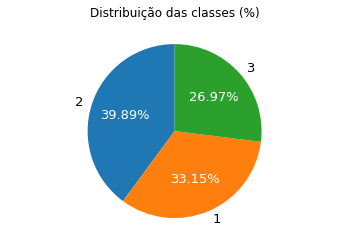

In [ ]:
total_classes = wine['class'].value_counts()
plt.axis('equal');
plt.title("Distribuição das classes (%)")
_, _, autotexts, = plt.pie(total_classes, labels=total_classes.index, autopct='%.2f%%', startangle=90, textprops={'fontsize': 13});
for autotext in autotexts:
    autotext.set_color('white')

plt.show()

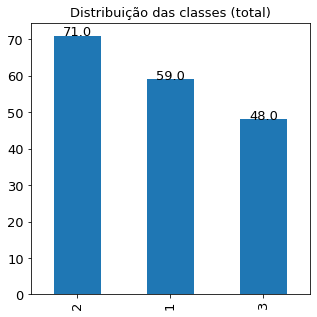

In [ ]:
ax = wine['class'].value_counts().plot.bar(figsize=(5,5))
ax.set_title("Distribuição das classes (total)")
x_offset = -0.15
y_offset = 0.06

#tamanho da fonte
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
  ax.get_xticklabels() + ax.get_yticklabels()):
  item.set_fontsize(13)

# colcando os totais no topo das colunas    
for p in ax.patches:
  b = p.get_bbox()
  val = "{:.1f}".format(b.y1 + b.y0)        
  ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=13)
plt.show()

###Descrição dos atributos


*   Com exceção da classe, formada por três categorias distintas de vinho, todos os outros atributos são quantitativos, representando o resultado de análises químicas realizadas com amostras de vinho.




In [ ]:
print("Descrição dos atributos")
table = PrettyTable()
#formata tabela com linha horizontal
table.hrules = 1

table.field_names = ('Atributo', 'Definição', 'Descrição')
table.add_row([atributos[0], "Classe", "Tipo do vinho dividido em três classes: 1, 2, 3"])
table.add_row([atributos[1], "Álcool (%vol)", "Teor álcoolico"])
table.add_row([atributos[2], "Ácido málico", 'Contribui para a recuperação muscular' ])
table.add_row([atributos[3], "Cinzas", 'Minerais influenciam a acidez do vinho.'])
table.add_row([atributos[4], "Alcalinidade das cinzas", 'Influencia no sabor ácido do vinho'])
table.add_row([atributos[5], "Magnésio",'Ajuda no metabolismo de Proteínas'])
table.add_row([atributos[6], "Fenois totais",'Antioxidantes'])
table.add_row([atributos[7], "Flavonoides", 'Antioxidantes, anticoagulantes e retarda o envelhecimento'])
table.add_row([atributos[8], "Não flavonoides",'Antioxidantes'])
table.add_row([atributos[9], "Proantocianidinas", 'Elevada Atividade Antioxidante'])
table.add_row([atributos[10], "Intensidade da cor", 'Cor do Vinho'])
table.add_row([atributos[11], "Tonalidade, matiz", 'Cor do Vinho'])
table.add_row([atributos[12], "D280 / OD315 de vinhos diluídos", ""])
table.add_row([atributos[13], "Prolina", 'Níveis de Aminoácidos que ajudam na síntese do Colágeno'])


print(table)

Descrição dos atributos
+-----------------+---------------------------------+-----------------------------------------------------------+
|     Atributo    |            Definição            |                         Descrição                         |
+-----------------+---------------------------------+-----------------------------------------------------------+
|      class      |              Classe             |      Tipo do vinho dividido em três classes: 1, 2, 3      |
+-----------------+---------------------------------+-----------------------------------------------------------+
|     alcohol     |          Álcool (%vol)          |                       Teor álcoolico                      |
+-----------------+---------------------------------+-----------------------------------------------------------+
|      malic      |           Ácido málico          |           Contribui para a recuperação muscular           |
+-----------------+---------------------------------+-----------

In [ ]:
print("Descrição dos atributos")
table = PrettyTable()
#formata tabela com linha horizontal
table.hrules = 1

table.field_names = ('Atributo', 'Definição', 'Descrição')
table.add_row([atributos[0], "Classe", "Tipo do vinho dividido em três classes: 1, 2, 3"])
table.add_row([atributos[1], "Álcool (%vol)", "Teor álcoolico"])
table.add_row([atributos[2], "Ácido málico", 'Contribui para a recuperação muscular' ])
table.add_row([atributos[3], "Cinzas", 'Minerais influenciam a acidez do vinho.'])
table.add_row([atributos[4], "Alcalinidade das cinzas", 'Influencia no sabor ácido do vinho'])
table.add_row([atributos[5], "Magnésio",'Ajuda no metabolismo de Proteínas'])
table.add_row([atributos[6], "Fenois totais",'Antioxidantes'])
table.add_row([atributos[7], "Flavonoides", 'Antioxidantes, anticoagulantes e retarda o envelhecimento'])
table.add_row([atributos[8], "Não flavonoides",'Antioxidantes'])
table.add_row([atributos[9], "Proantocianidinas", 'Elevada Atividade Antioxidante'])
table.add_row([atributos[10], "Intensidade da cor", 'Cor do Vinho'])
table.add_row([atributos[11], "Tonalidade, matiz", 'Cor do Vinho'])
table.add_row([atributos[12], "D280 / OD315 de vinhos diluídos", ""])
table.add_row([atributos[13], "Prolina", 'Níveis de Aminoácidos que ajudam na síntese do Colágeno'])


print(table)

Descrição dos atributos
+-----------------+---------------------------------+-----------------------------------------------------------+
|     Atributo    |            Definição            |                         Descrição                         |
+-----------------+---------------------------------+-----------------------------------------------------------+
|      class      |              Classe             |      Tipo do vinho dividido em três classes: 1, 2, 3      |
+-----------------+---------------------------------+-----------------------------------------------------------+
|     alcohol     |          Álcool (%vol)          |                       Teor álcoolico                      |
+-----------------+---------------------------------+-----------------------------------------------------------+
|      malic      |           Ácido málico          |           Contribui para a recuperação muscular           |
+-----------------+---------------------------------+-----------

###Valore nulos e duplicados

O dataset não possui valores nulos ou ausentes

In [ ]:
print("Valores nulos por atributo:") 
wine.isnull().sum()


Valores nulos por atributo:


class              0
alcohol            0
malic              0
ash                0
alcalinity         0
magnesium          0
phenols            0
flavanoids         0
nonflavanoid       0
proanthocyanins    0
color              0
hue                0
dilution           0
proline            0
dtype: int64

In [ ]:
# verificando se há colunas duplicadas
print('Quantidade de colunas duplicadas:\n')
wine.duplicated().sum()

Quantidade de colunas duplicadas:



0

### Estatísticas descritivas

Observando as estatísticas descritivas, nota-se que o máximo dos atributos *cor*, *alcalinity* e *magnesium* está muito distante de suas média, modas e Q3, dando indício da presença de outliers.


*   Apesar de ter as estatísticas descritivas, o grupo não possui conhecimento suficiente sobre o domínio do dataset para identificar se existem valores fora de uma faixa de valores aceitáveis para cada atributo (ex: muito pequenos ou muito altos), dificultando a identifcação de valores inválidos.





Moda

In [ ]:
wine.mode(numeric_only=False, dropna=True)

,class,alcohol,malic,ash,alcalinity,magnesium,phenols,flavanoids,nonflavanoid,proanthocyanins,color,hue,dilution,proline
0,2.0,12.37,1.73,2.28,20.0,88.0,2.2,2.65,0.26,1.35,2.6,1.04,2.87,520.0
1,NaN,13.05,NaN,2.30,NaN,NaN,NaN,NaN,0.43,NaN,3.8,NaN,NaN,680.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN


In [ ]:
# Sumário Estatístico do dataset
#Excluindo a classe, que é categórica
cols = set(wine.columns) - {'class'}
df1 = wine[list(cols)]
df1.describe().T
#wine.describe(exclude=['class']).T

,count,mean,std,min,25%,50%,75%,max
hue,178.0,0.957449,0.228572,0.48,0.7825,0.965,1.1200,1.71
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
proline,178.0,746.893258,314.907474,278.00,500.5000,673.500,985.0000,1680.00
nonflavanoid,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66


In [ ]:
# Simetria de cada atributo
# Maior que 0: a distribuição é assimétrica positiva (maior à esquerda e menor à direita).
# Menor que 0: a distribuição é assimétrica negativa (maior à direita e menor à esquerda).
# Igual a 0: a distribuição é simétrica.

wine.skew()

class              0.107431
alcohol           -0.051482
malic              1.039651
ash               -0.176699
alcalinity         0.213047
magnesium          1.098191
phenols            0.086639
flavanoids         0.025344
nonflavanoid       0.450151
proanthocyanins    0.517137
color              0.868585
hue                0.021091
dilution          -0.307285
proline            0.767822
dtype: float64

### Histogramas

Com os histogramas, conseguimos avaliar a simetria dos atributos. Percebe-se que algumas variáveis estão próximas de uma distribuição normal, como ash, alcalinity, proanthocyanins e hue, enquanto as outras possuem distribuições assimétricas. Para algoritmos que assumem que o dado possui uma distribuição normal, pode ser interessante aplicar uma operação de pré-processamento como a Power Transform.

Gráficos univariados para ver a distribuição 


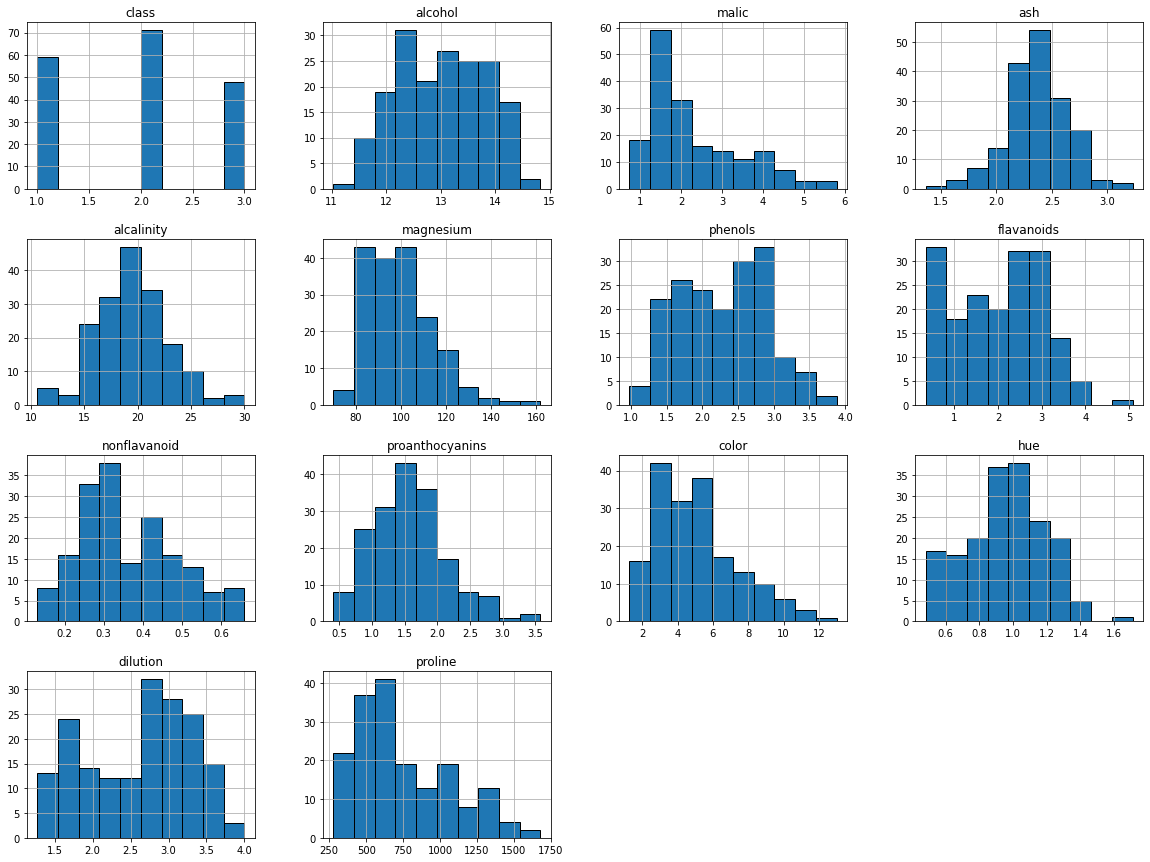

In [ ]:
# Gráficos univariados para ver a distribuição 
print("Gráficos univariados para ver a distribuição ")
wine.hist(figsize=(20, 15), edgecolor='black')
plt.show()

### Matriz de correlação

Nota-se que os atributos *flavanoids* e *dilution*, assim como *flavanoids* e *phenols*, apresentam alta correlação entre si, outros como *phenols* e *dilution* e *flavanoids* e *proanthocyanins* também têm graus de correlação considerável. Já a maioria das outras variáveis estão mais próximas de não terem correlção ou têm correlação negativa.

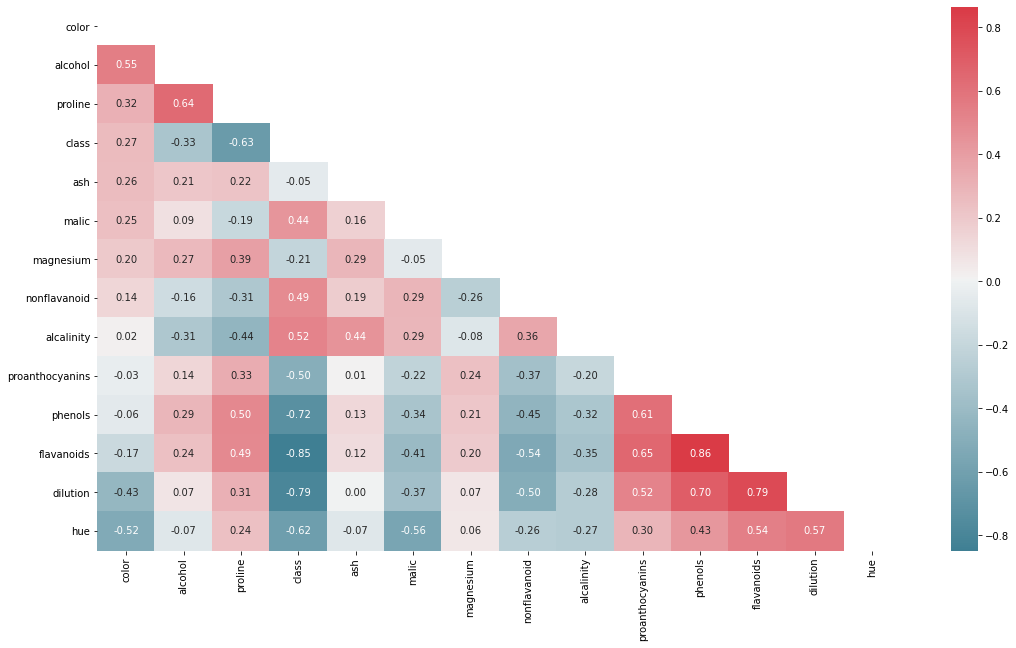

In [ ]:
# Matriz de lado único, sem valores redundantes

corr = wine.corr()
top_corr_cols = corr.color.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)
plt.show()

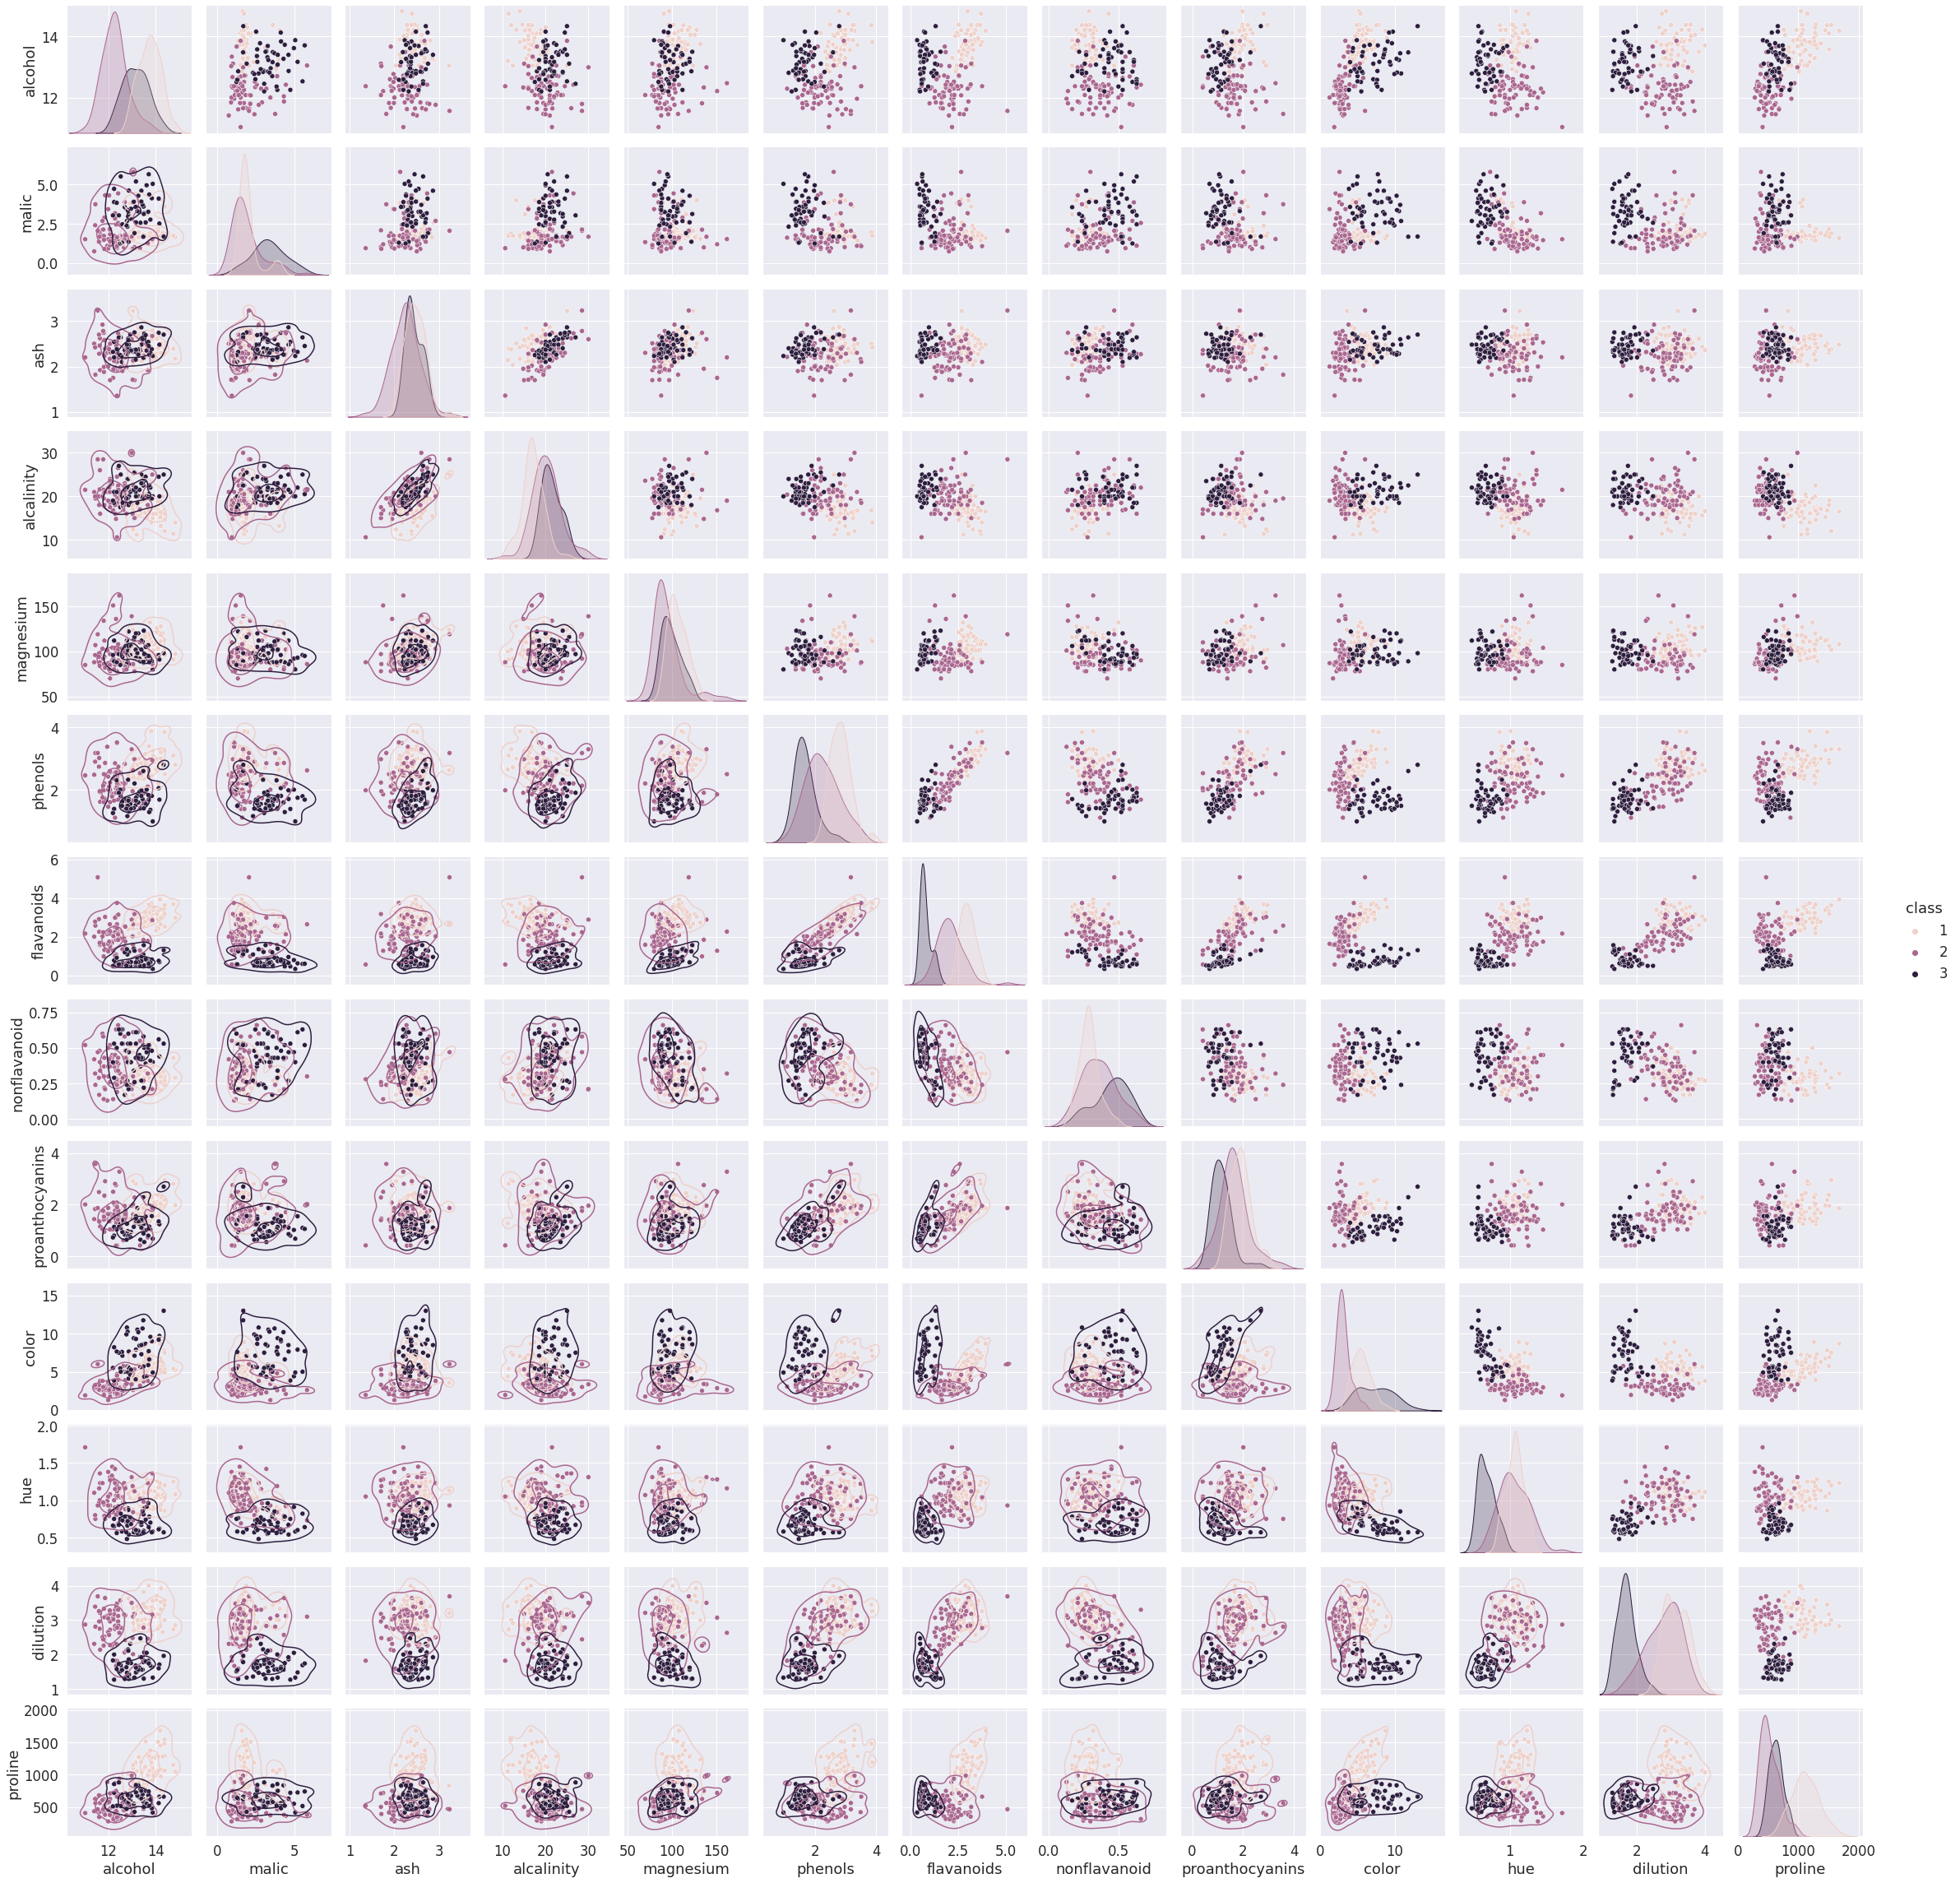

In [ ]:
# visualizando a distribuição das classes na relação entre as variáveis
grid = sns.pairplot(wine, hue = 'class', diag_kind = 'kde')
grid.map_lower(sns.kdeplot, levels = 3)

In [ ]:
# geração do report
#profile = ProfileReport(wine, title='Pandas Profiling Report', html={'style':{'full_width':False}})
#profile.to_notebook_iframe()

## Pré-processamento

In [ ]:
array = wine.values

# Separando o array em componentes de input e output
X = array[:,1:]
Y = array[:,0]

### Normalização

In [ ]:
# 1. Normalize o dataset usando MinMaxScaler

# Normalizando os dados
scaler = MinMaxScaler().fit(X)
normalizedX = scaler.transform(X)

In [ ]:
# Sumarizando os dados transformados
print("Dados Originais: \n\n", wine.values)
print("\nDados Normalizados: \n\n", normalizedX[0:5,:])

Dados Originais: 

 [[1.000e+00 1.423e+01 1.710e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]

Dados Normalizados: 

 [[0.84210526 0.1916996  0.57219251 0.25773196 0.61956522 0.62758621
  0.57383966 0.28301887 0.59305994 0.37201365 0.45528455 0.97069597
  0.56134094]
 [0.57105263 0.2055336  0.4171123  0.03092784 0.32608696 0.57586207
  0.51054852 0.24528302 0.27444795 0.26450512 0.46341463 0.78021978
  0.55064194]
 [0.56052632 0.3201581  0.70053476 0.41237113 0.33695652 0.62758621
  0.61181435 0.32075472 0.75709779 0.37542662 0.44715447 0.6959707
  0.64693295]
 [0.87894737 0.23913043 0.60962567 0.31958763 0.4673913  0.98965517
  0.66455696 0.20754717 0.55835

    alcohol     malic       ash  ...  dilution   proline  class
0  0.842105  0.191700  0.572193  ...  0.970696  0.561341    1.0
1  0.571053  0.205534  0.417112  ...  0.780220  0.550642    1.0
2  0.560526  0.320158  0.700535  ...  0.695971  0.646933    1.0
3  0.878947  0.239130  0.609626  ...  0.798535  0.857347    1.0
4  0.581579  0.365613  0.807487  ...  0.608059  0.325963    1.0

[5 rows x 14 columns]
Gráficos univariados para ver a distribuição 


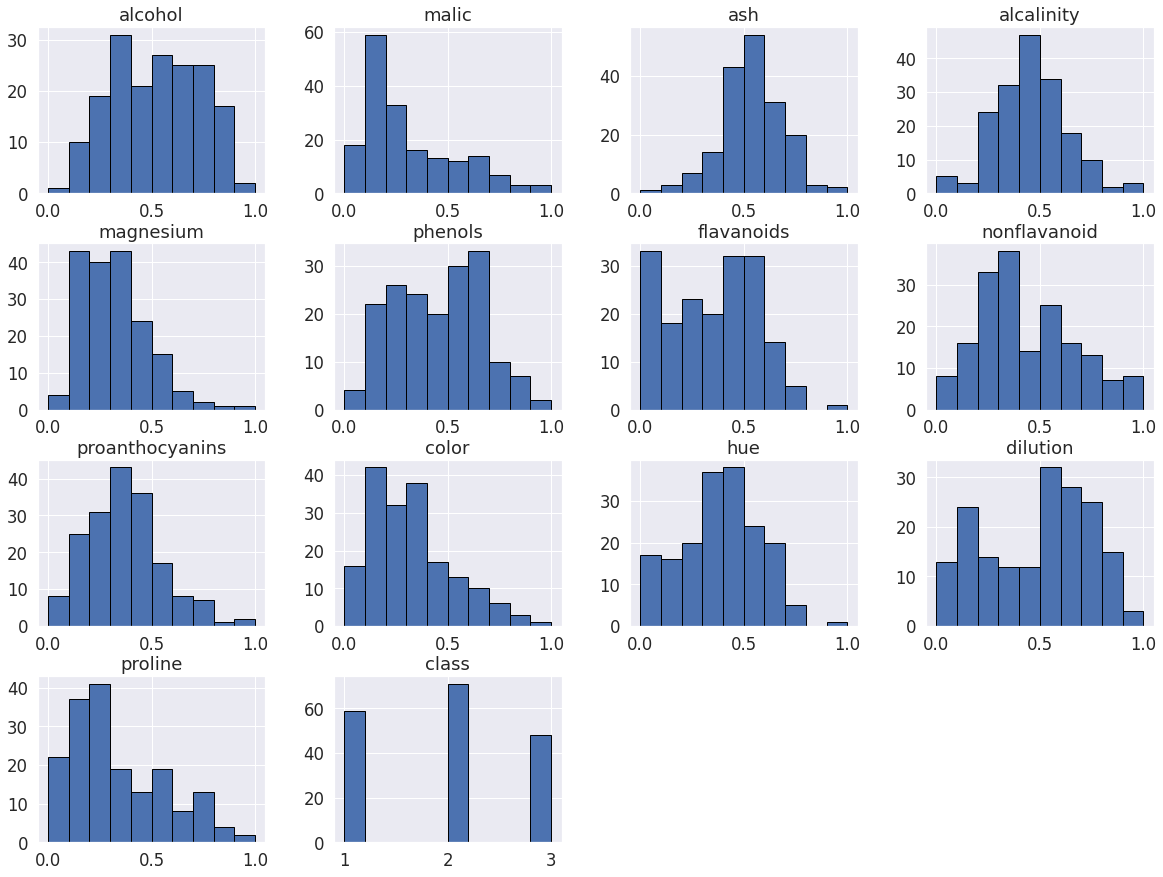

In [ ]:
# Remontando dataset para visualizar a mudança na curva dos dados 
atributos_sem_classe = ['alcohol', 'malic', 'ash', 'alcalinity', 'magnesium', 'phenols', 'flavanoids', 'nonflavanoid', 'proanthocyanins', 'color', 'hue', 'dilution', 'proline']

wine_y = pd.DataFrame(Y, columns =['class'])
wine_norm = pd.DataFrame(normalizedX, columns=atributos_sem_classe)
wine_norm = wine_norm.join(wine_y)
print(wine_norm.head())

# Gráficos univariados para ver a distribuição 
print("Gráficos univariados para ver a distribuição ")
wine_norm.hist(figsize=(20, 15), edgecolor='black')
plt.show()

In [ ]:
# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# transformando os dados
scaled = scaler.fit_transform(wine)
print(scaled)

[[0.         0.84210526 0.1916996  ... 0.45528455 0.97069597 0.56134094]
 [0.         0.57105263 0.2055336  ... 0.46341463 0.78021978 0.55064194]
 [0.         0.56052632 0.3201581  ... 0.44715447 0.6959707  0.64693295]
 ...
 [1.         0.58947368 0.69960474 ... 0.08943089 0.10622711 0.39728959]
 [1.         0.56315789 0.36561265 ... 0.09756098 0.12820513 0.40085592]
 [1.         0.81578947 0.66403162 ... 0.10569106 0.12087912 0.20114123]]


Gráficos univariados para ver a distribuição após normalização 


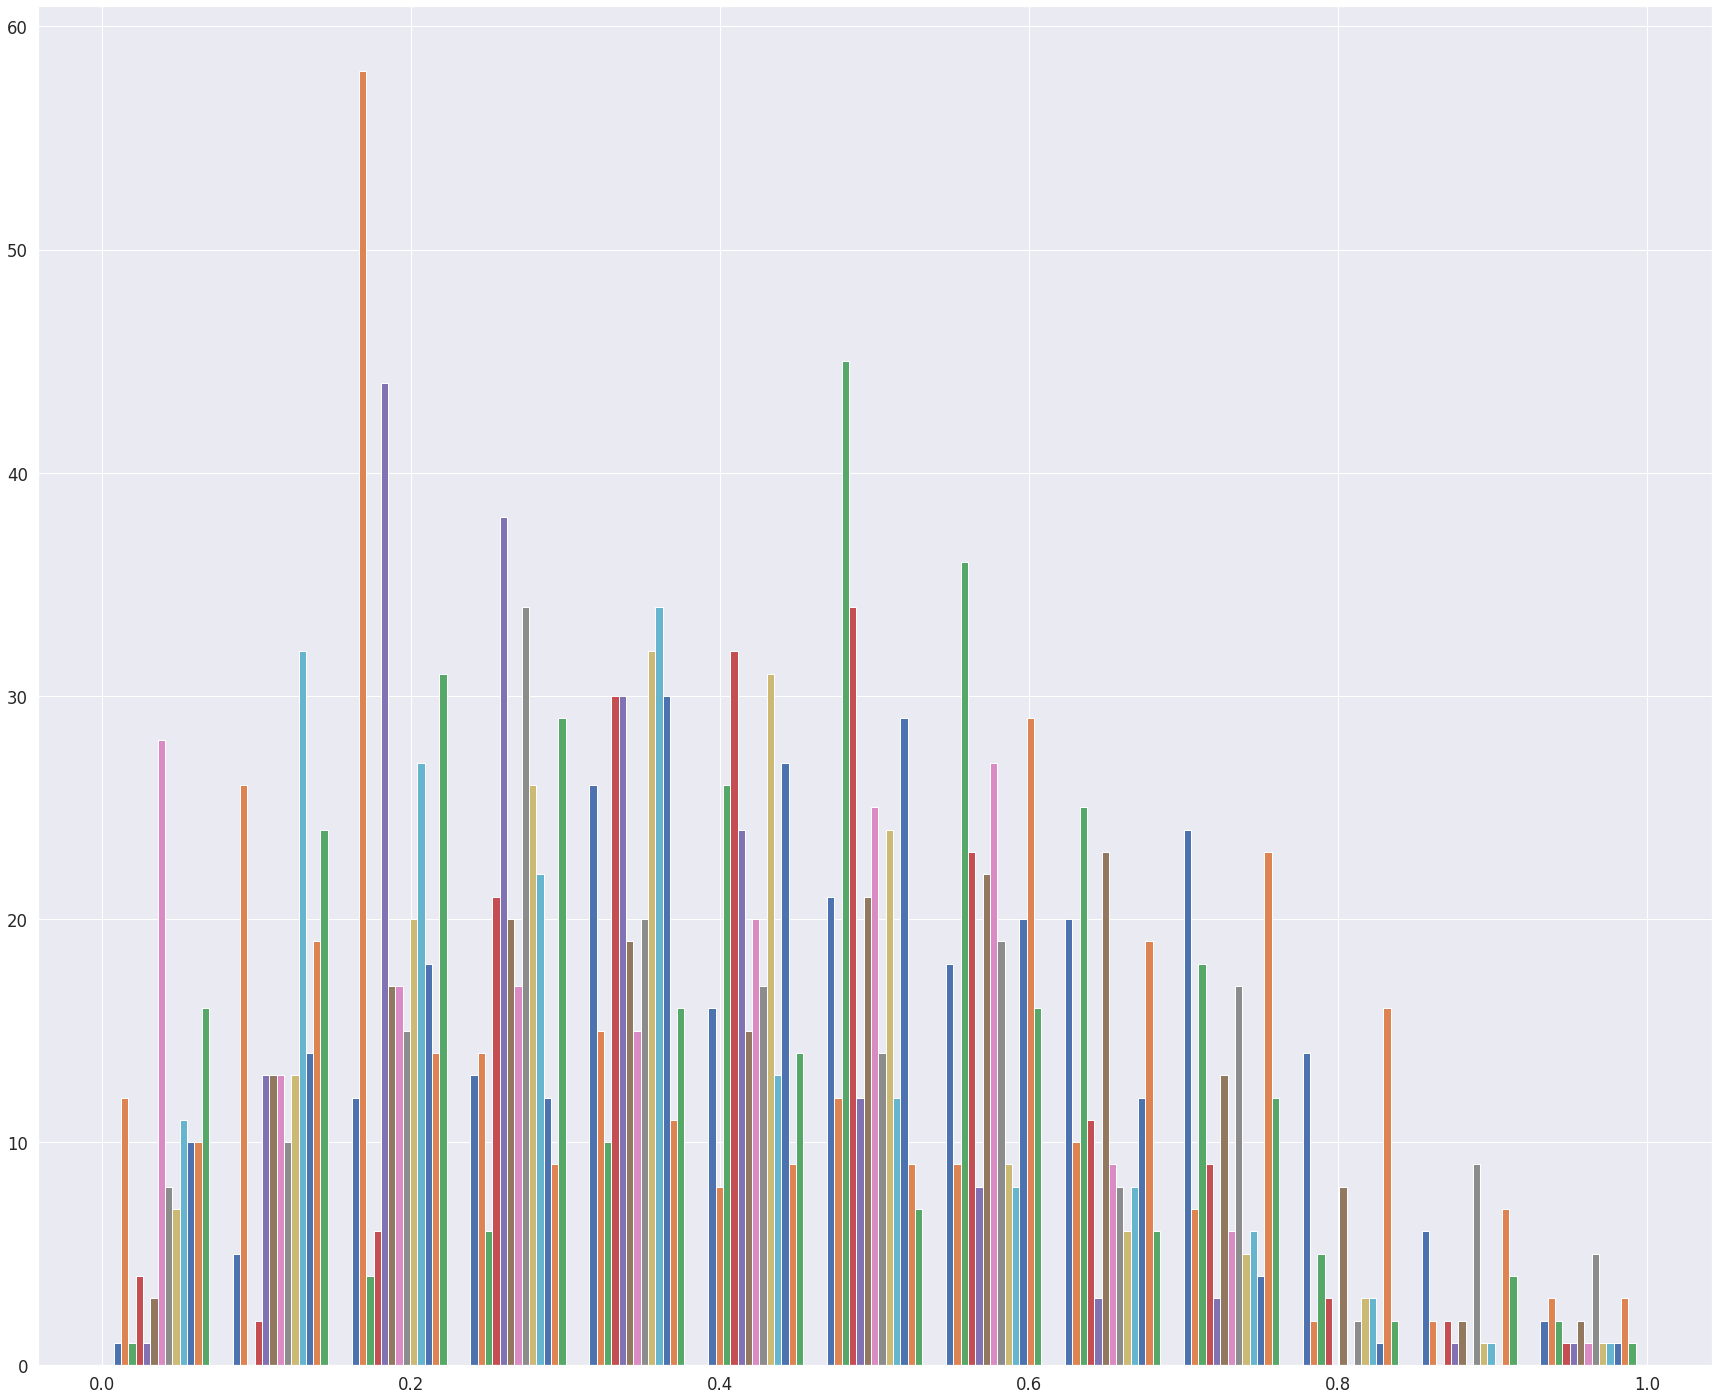

In [ ]:
print("Gráficos univariados para ver a distribuição após normalização ")
#plt.hist(normalizedX, bins='auto')
plt.figure(figsize=[30,25])
plt.hist(x=normalizedX, bins=13)
plt.show()

### Padronização

In [ ]:
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

In [ ]:
# Sumarizando os dados transformados
print("Dados Originais: \n\n", wine.values)
print("\nDados Padronizados: \n\n", standardX[0:5,:])

Dados Originais: 

 [[1.000e+00 1.423e+01 1.710e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]

Dados Padronizados: 

 [[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.9309184

In [ ]:
# definindo o transformador como standard scaler
scaler = StandardScaler()

# transformando os dados
scaled = scaler.fit_transform(wine)
print(scaled)

[[-1.21394365  1.51861254 -0.5622498  ...  0.36217728  1.84791957
   1.01300893]
 [-1.21394365  0.24628963 -0.49941338 ...  0.40605066  1.1134493
   0.96524152]
 [-1.21394365  0.19687903  0.02123125 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 1.37386437  0.33275817  1.74474449 ... -1.61212515 -1.48544548
   0.28057537]
 [ 1.37386437  0.20923168  0.22769377 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.37386437  1.39508604  1.58316512 ... -1.52437837 -1.42894777
  -0.59516041]]


Proantocianidinas, flavonoides e não-flavonoides são todos compostos organicos pertencentes ao  grupo dos fenóis. Além disso Proantocianidinas são flavonóides. Considerando isso, a coluna de fenóis apresenta informações redundantes.

Considerando correlação entre si e com a Classe e simetria dos atributos, os processos de padronização e normalização serão feitos também para um formato do dataset com as colunas proanthocyanins e phenols removidas.

In [ ]:
# removendo colunas
wine_removido = wine.drop(['proanthocyanins','phenols'], axis = 1)
print(wine_removido.columns)

Index(['class', 'alcohol', 'malic', 'ash', 'alcalinity', 'magnesium',
       'flavanoids', 'nonflavanoid', 'color', 'hue', 'dilution', 'proline'],
      dtype='object')


In [ ]:
array_removido = wine_removido.values
X_removido = array_removido[:,1:]
Y = array_removido[:,0]

# Padronizando os dados
scaler = StandardScaler()
X_removido_std = scaler.fit_transform(X_removido)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", wine_removido.values)
print("\nDados Padronizados: \n\n", X_removido_std[0:5,:])

Dados Originais: 

 [[1.000e+00 1.423e+01 1.710e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]

Dados Padronizados: 

 [[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  1.03481896
  -0.65956311  0.25171685  0.36217728  1.84791957  1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.73362894
  -0.82071924 -0.29332133  0.40605066  1.1134493   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  1.21553297
  -0.49840699  0.26901965  0.31830389  0.78858745  1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  1.46652465
  -0.98187536  1.18606801 -0.42754369  1.18407144  2.33457383]


In [ ]:
# normalizando os dados
scaler = MinMaxScaler()
X_removido_norm = scaler.fit_transform(X_removido)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", wine_removido.values)
print("\nDados Normalizados: \n\n", X_removido_norm[0:5,:])

Dados Originais: 

 [[1.000e+00 1.423e+01 1.710e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]

Dados Normalizados: 

 [[0.84210526 0.1916996  0.57219251 0.25773196 0.61956522 0.57383966
  0.28301887 0.37201365 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  0.03092784 0.32608696 0.51054852
  0.24528302 0.26450512 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 0.41237113 0.33695652 0.61181435
  0.32075472 0.37542662 0.44715447 0.6959707  0.64693295]
 [0.87894737 0.23913043 0.60962567 0.31958763 0.4673913  0.66455696
  0.20754717 0.55631399 0.30894309 0.7985348  0.85734665]
 [0.58157895 0.36561265 0.80748663 0.5360824

**Agora pesquise outras operações ou comandos (não estudados em sala) e realize outros tipos de técnicas de análise exploratória e pré-processamento de dados.**

In [ ]:


import plotly.express as px

fig = px.scatter_3d(wine, x='flavanoids', y='hue', z='phenols',
              color='class')
fig.show()


**O que você aprendeu sobre este dataset?**

> O dataset de vinhos é um dataset muito detalhado, com características bem definidas a respeito de composição singularidades de cada tipo de vinho. Este dataset apresenta dados muito bem organizados, provavelmente provenientes de um sistema automatizado para catalogar as medições realizadas. Os dados são resultado de uma análise química de      vinhos cultivados numa mesma região na Itália. O dataset traz informações sobre vinhos produzidos em três cultivares. Na Análise Exploratória do Dataset é possível observar as principais características de cada cultiva.

> Cultiva 1 - Possui propriedades em destaque com maior teor alcoólico, possui altos índices nas propriedades antioxidantes e Aminoácidos.

> Cultiva 2 - Possui propriedades medianas, porém destaca-se na cor e no índice de Magnésio que ajuda no metabolismo.

> Cultiva 3 - Pode ser considerado um vinho mais ácido com cor intensa e com potencial relaxante, pois tem alto índice de Ácido Málico.

> Em relação aos dados, esse dataset possui apenas dados numéricos, ou seja, nenhum atributo é categórico. Percebi também que a distribuição das classes está proporcional, de certa forma, pois a maior diferença entre elas, falando de percentual, é 12. O dataset possui 178 instâncias e 13 atributos, onde não foram encontrados valores faltantes para nenhum deles. A Classe que apresenta maior quantidade de registros com o valor 2, mas ainda está bem balanceada.

> Algumas informações contidas nos atributos podem ser removidas por estarem contidas em outros, gerando informações mais detalhadas, porém redundantes. A maioria de seus atributos se aproxima mais de uma distribuição simétrica do que assimétrica. A variável que apresenta maior correlação com a Classe é Flavonoids (0.85) e a que menos apresenta correlação é Ash (0.05).


**O que você aprendeu sobre as técnicas de análise exploratória e pré-processamento de dados?**

> As técnicas de análise exploratória possuem como principal objetivo a obtenção de informação sobre os dados e suas relações. Estas técnicas são melhor utilizadas quando se tem algum conhecimento prévio sobre o universo dos dados analisados. Neste caso, saber como foram feitas as medidas das substâncias presentes nos vinhos, e quais métricas foram utilizadas ajudaria na hora de determinar limites para os valores e avaliação de outliers, assim com permitiria uma melhor compreensão de como redimensionar os atributos para que sejam comparáveis entre si de forma mais adequada. 

> Através das técnicas de análise exploratória e pré-processamento, conseguimos identificar e compreender com mais clareza a estrutura de cada dado visualizado no dataset, é fundamental realizar uma análise detalhada dos dados, definir uma forma de organizá-los e optar por mantê-los ou sintetizá-los de forma que seja possível obter as informações necessárias do conjunto de dados para responder às questões que estão sendo estudadas.

> A aplicação das técnicas de análise com phyton, na questão da visualização, se mostrou mais completa. É possível que pelo conhecimento adquirido com o Weka, onde analisamos os dados a fundo, se torna mais intuitivo e fácil de entender o passo a passo executado com o phyton. 